## Linear Regression Model from Scratch

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [25]:
data = pd.read_csv("data_for_lr.csv")

In [26]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


### Data Preprocessing

In [27]:
data = data.dropna()

In [28]:
data.isnull().sum()

x    0
y    0
dtype: int64

### Splitting data into the train input and train output

In [29]:
train_input = np.array(data["x"][:500]).reshape(500,1)
train_output = np.array(data["y"][:500]).reshape(500,1)

In [30]:
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

### Splitting data into Test input and test output

In [31]:
test_input = np.array(data["x"][500:]).reshape(199,1)
test_output = np.array(data["y"][500:]).reshape(199,1)

In [32]:
test_input

array([[  5.],
       [ 61.],
       [ 47.],
       [ 98.],
       [ 30.],
       [ 63.],
       [  0.],
       [100.],
       [ 18.],
       [ 30.],
       [ 98.],
       [ 16.],
       [ 22.],
       [ 55.],
       [ 43.],
       [ 75.],
       [ 91.],
       [ 46.],
       [ 85.],
       [ 55.],
       [ 36.],
       [ 49.],
       [ 94.],
       [ 43.],
       [ 22.],
       [ 37.],
       [ 24.],
       [ 95.],
       [ 61.],
       [ 75.],
       [ 68.],
       [ 58.],
       [  5.],
       [ 53.],
       [ 80.],
       [ 83.],
       [ 25.],
       [ 34.],
       [ 26.],
       [ 90.],
       [ 60.],
       [ 49.],
       [ 19.],
       [ 92.],
       [ 29.],
       [  8.],
       [ 57.],
       [ 29.],
       [ 19.],
       [ 81.],
       [ 50.],
       [ 15.],
       [ 70.],
       [ 39.],
       [ 43.],
       [ 21.],
       [ 98.],
       [ 86.],
       [ 16.],
       [ 25.],
       [ 31.],
       [ 93.],
       [ 67.],
       [ 49.],
       [ 25.],
       [ 88.],
       [ 5

## Forward Propogation

#### f(x) = mx + c

In [33]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost Function
#### summation (y_pred - y)^2 / 2n

In [34]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## Gradient Descent for Back-Propogation
##### df = sum(f(x) - y) / n
##### dm = df * x
##### dc = df * 1

In [35]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update Parameters
##### m = m - (learning_rate * dm)
##### c = c - (learning_rate * dc)

In [36]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [37]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 5960.773309605804


<Figure size 640x480 with 0 Axes>

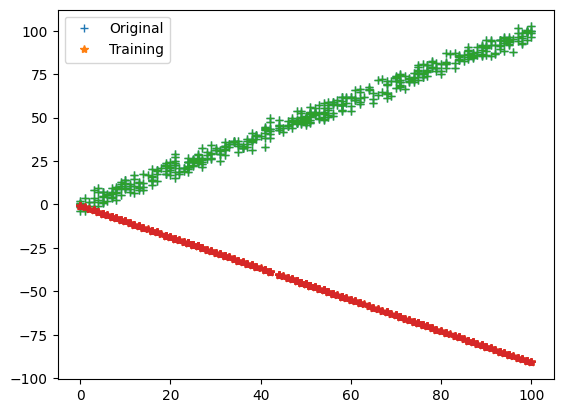

Iteration = 2, Loss = 2706.5590705098994


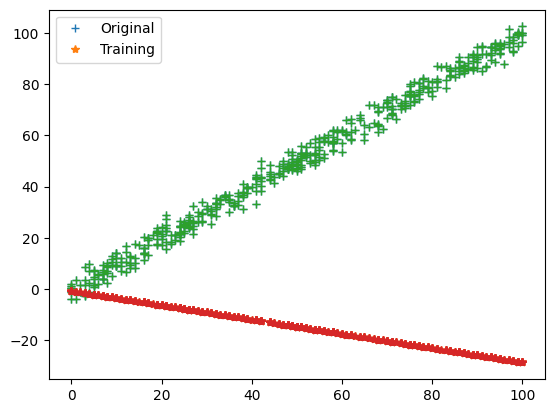

Iteration = 3, Loss = 1230.1184650556756


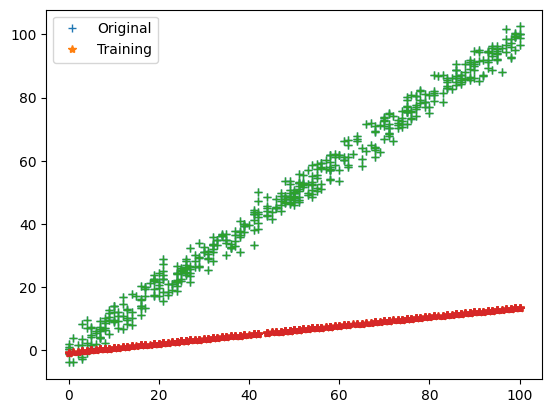

Iteration = 4, Loss = 560.2557263200619


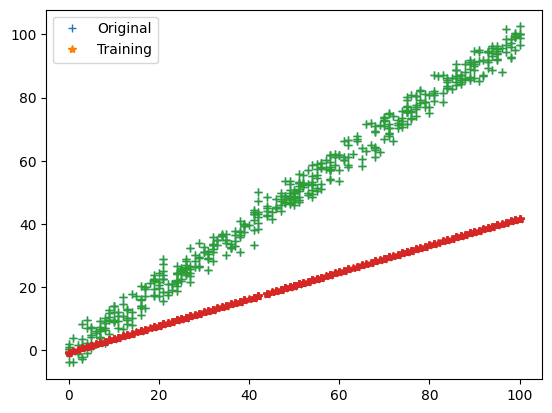

Iteration = 5, Loss = 256.33825911360304


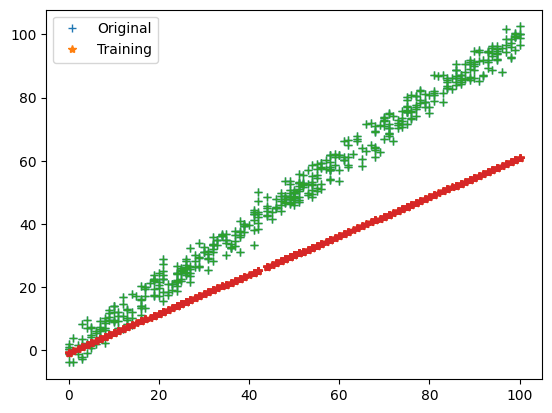

Iteration = 6, Loss = 118.45056693602088


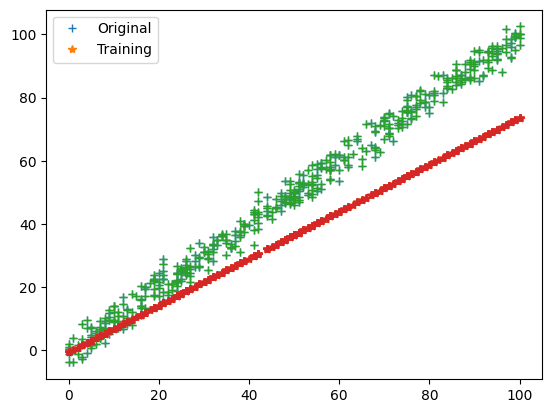

Iteration = 7, Loss = 55.89076759049553


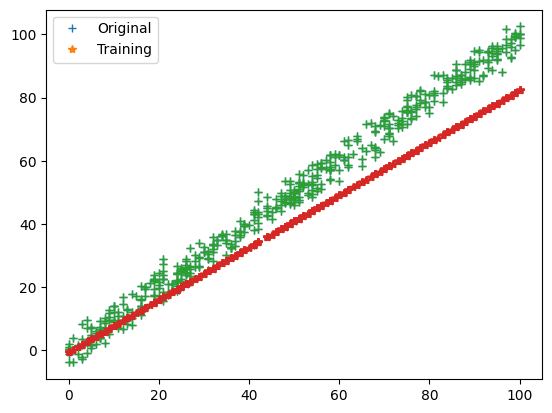

Iteration = 8, Loss = 27.507316659187047


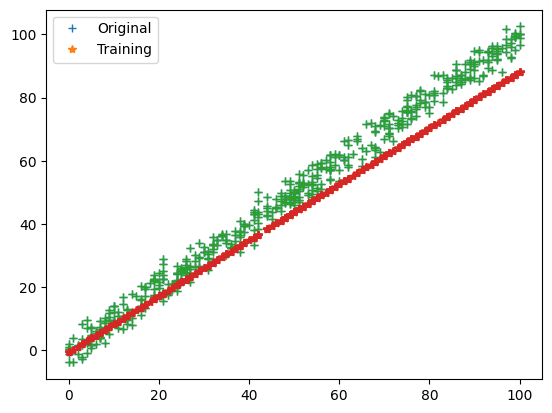

Iteration = 9, Loss = 14.629712858574777


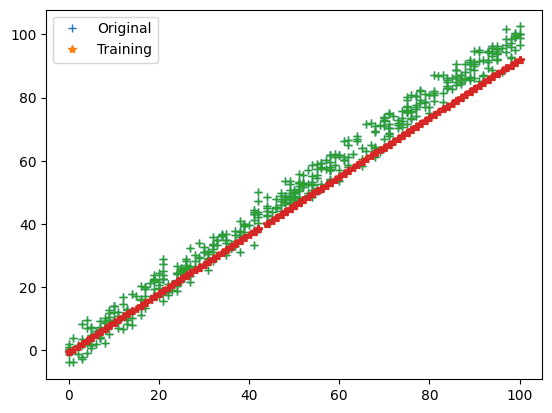

Iteration = 10, Loss = 8.787129076108634


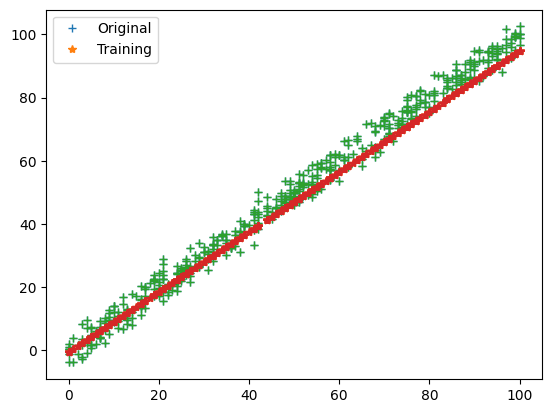

Iteration = 11, Loss = 6.136341668187541


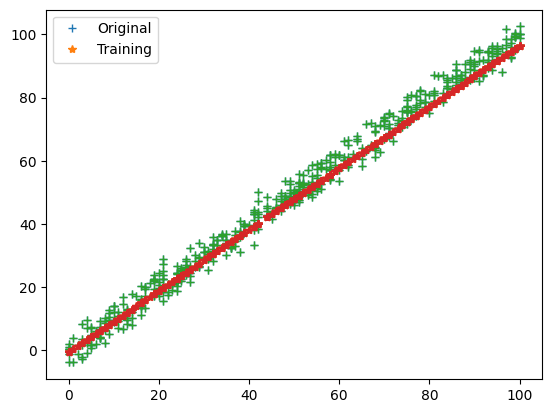

Iteration = 12, Loss = 4.933675810796674


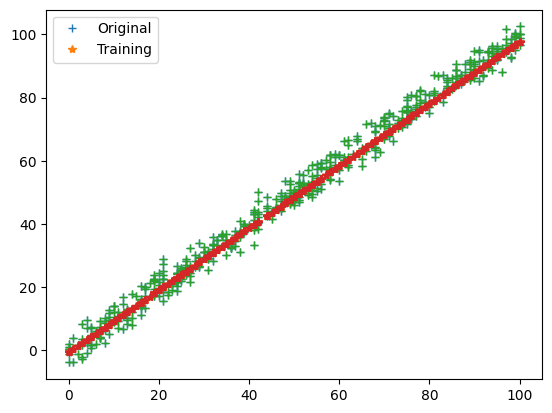

Iteration = 13, Loss = 4.3880243049144685


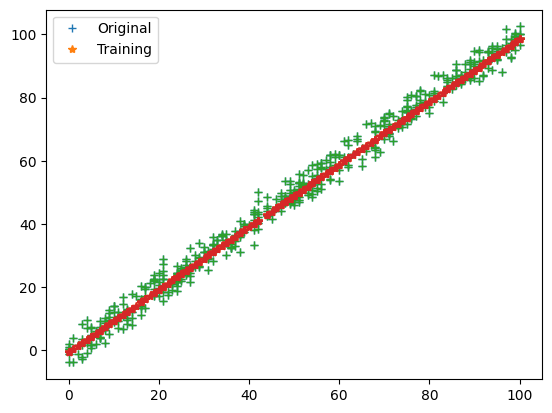

Iteration = 14, Loss = 4.140460938081871


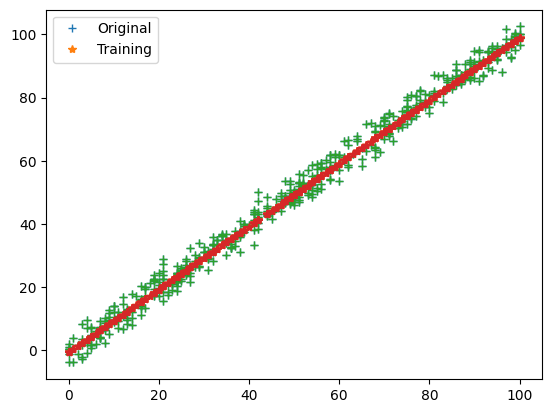

Iteration = 15, Loss = 4.0281404901447555


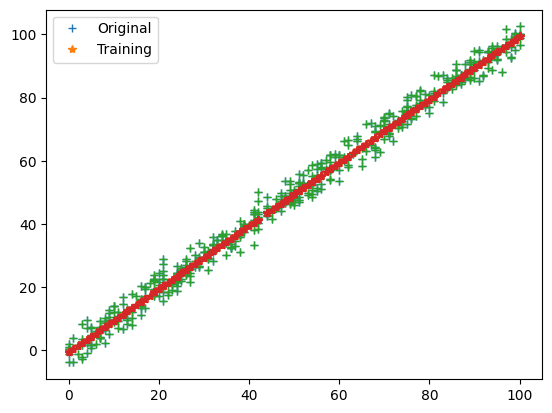

Iteration = 16, Loss = 3.9771799043451135


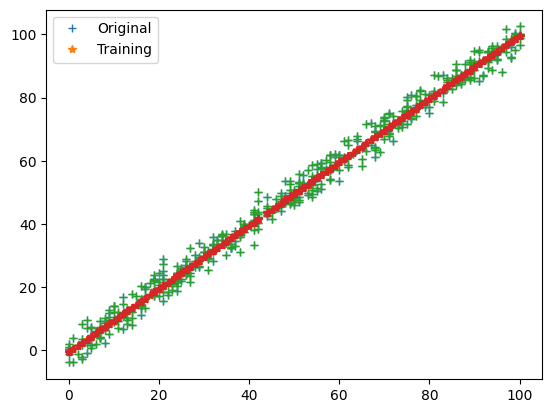

Iteration = 17, Loss = 3.9540583559959157


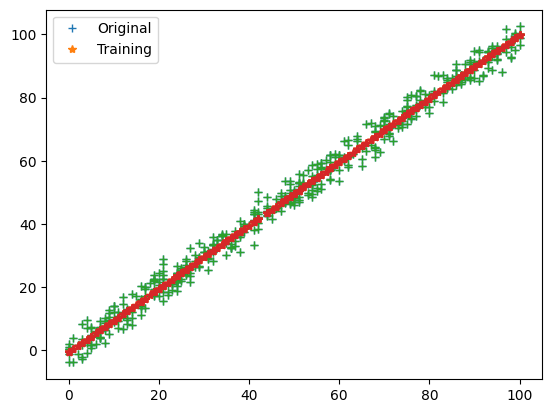

Iteration = 18, Loss = 3.943567409807606


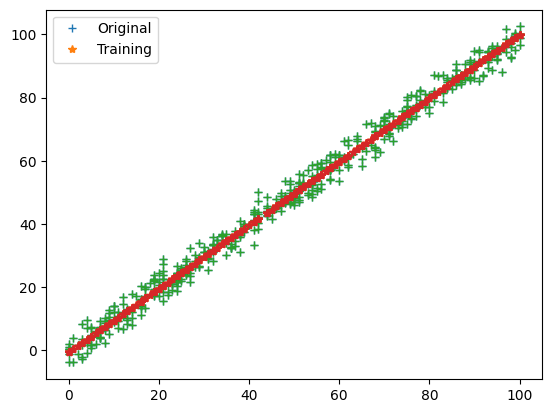

Iteration = 19, Loss = 3.9388069818438254


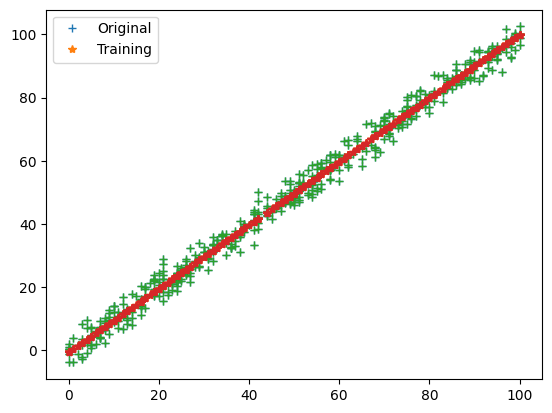

Iteration = 20, Loss = 3.9366464963798222


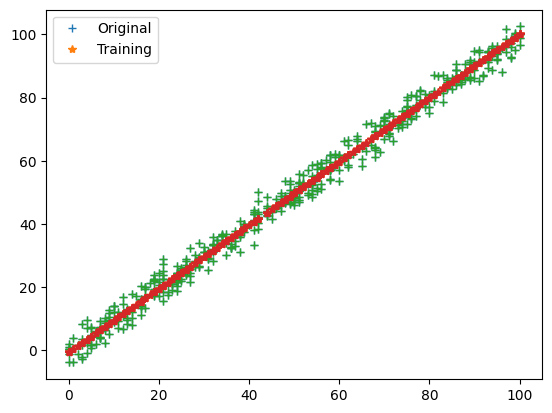

In [38]:
parameters, loss = train(train_input, train_output, 0.0001, 20)


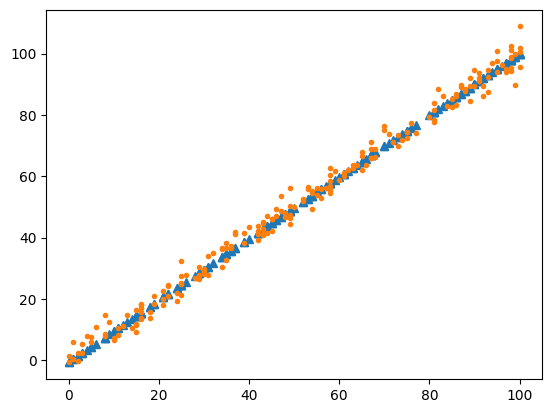

In [39]:
test_predictions = test_input*parameters["m"] + parameters["c"]
plt.plot(test_input, test_predictions, "^", label="Prediction")
plt.plot(test_input, test_output, ".", label="Trained")
plt.show()

## SkLearn Model

In [40]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(train_input, train_output)

LinearRegression()

In [47]:
lr.coef_ #value of m

array([[1.0009993]])

In [48]:
lr.intercept_ #value of c

array([-0.23603461])